# Exercises: Maximum Likelihood Estimation - Answer Key
By Christopher van Hoecke, Max Margenot, and Delaney Mackenzie

## Lecture Link : 
https://www.quantopian.com/lectures/maximum-likelihood-estimation

### IMPORTANT NOTE: 
This lecture corresponds to the Maximum Likelihood Estimation lecture, which is part of the Quantopian lecture series. This homework expects you to rely heavily on the code presented in the corresponding lecture. Please copy and paste regularly from that lecture when starting to work on the problems, as trying to do them from scratch will likely be too difficult.

Part of the Quantopian Lecture Series:

* [www.quantopian.com/lectures](https://www.quantopian.com/lectures)
* [github.com/quantopian/research_public](https://github.com/quantopian/research_public)

Notebook released under the Creative Commons Attribution 4.0 License.

----

## Key Concepts
Normal Distribution MLE Estimators: 

$$
\hat\mu = \frac{1}{T}\sum_{t=1}^{T} x_t \\\qquad \hat\sigma = \sqrt{\frac{1}{T}\sum_{t=1}^{T}{(x_t - \hat\mu)^2}}
$$



Exponential Distribution MLE Estimators: 
$$\hat\lambda = \frac{\sum_{t=1}^{T} x_t}{T}$$

In [1]:
# Useful Libraries
import pandas as pd
import math
import matplotlib.pyplot as plt
import numpy as np
import scipy
import scipy.stats as stats

----

# Exercise 1: Normal Distribution
- Given the equations above, write down functions to calculate the MLE estimators $\hat{\mu}$ and $\hat{\sigma}$ of the normal distribution. 
- Given the sample normally distributed set, find the maximum likelihood $\hat{\mu}$ and $\hat{\sigma}$.
- Fit the data to a normal distribution using SciPy. Compare SciPy's calculated parameters with your calculated values of $\hat{\mu}$ and $\hat{\sigma}$.
- Plot a normal distribution PDF with your estimated parameters

In [2]:
# Normal mean and standard deviation MLE estimators
def normal_mu(X):
    # Get the number of observations
    T = len(X)
    # Sum the observations
    s = sum(X)
    return 1.0/T * s

def normal_sigma(X):
    T = len(X)
    # Get the mu MLE
    mu = normal_mu(X)
    # Sum the square of the differences
    s = sum( np.power((X - mu), 2) )
    # Compute sigma^2
    sigma_squared = 1.0/T * s
    return math.sqrt(sigma_squared)

In [3]:
# Normal Distribution Sample Data
TRUE_MEAN = 40
TRUE_STD = 10
X = np.random.normal(TRUE_MEAN, TRUE_STD, 10000000)

# Use your functions to compute the MLE mu and sigma
mu = normal_mu(X)
std = normal_sigma(X)

print 'Maximum likelihood value of mu:', mu
print 'Maximum likelihood value for sigma:', std

Maximum likelihood value of mu: 39.9907086081
Maximum likelihood value for sigma: 10.003042353


In [4]:
# Fit the distribution using SciPy and compare those parameters with yours 
scipy_mu, scipy_std = scipy.stats.norm.fit(X)
print 'Scipy Maximum likelihood value of mu:', scipy_mu
print 'Scipy Maximum likelihood value for sigma:', scipy_std

Scipy Maximum likelihood value of mu: 39.9907086081
Scipy Maximum likelihood value for sigma: 10.003042353


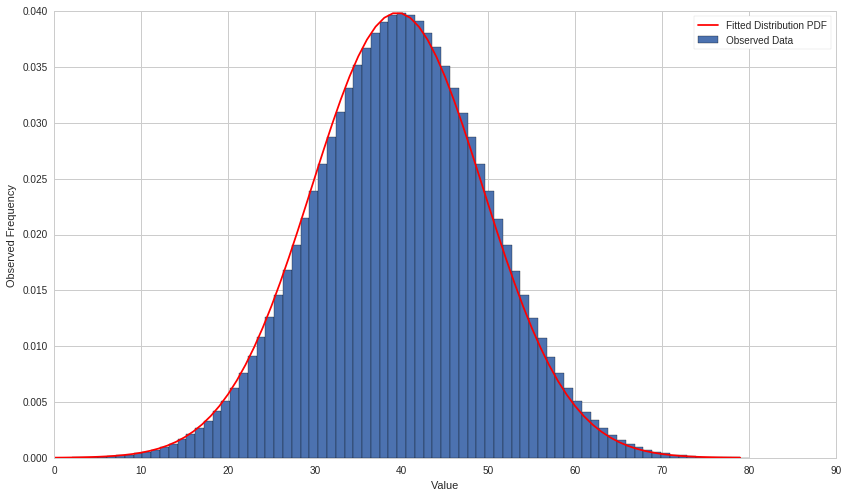

In [5]:
# Get the PDF, fill it with your calculated parameters, and plot it along x
x = np.linspace(0, 80, 80)

plt.hist(X, bins=x, normed='true')
plt.plot(scipy.stats.norm.pdf(x, loc=mu, scale=std), color='red')
plt.xlabel('Value')
plt.ylabel('Observed Frequency')
plt.legend(['Fitted Distribution PDF', 'Observed Data', ]);

------

# Exercise 2: Exponential Distribution
- Given the equations above, write down functions to calculate the MLE estimator $\hat{\lambda}$ of the exponential distribution
- Given the sample exponentially distributed set, find the maximum likelihood
- Fit the data to an exponential distribution using SciPy. Compare SciPy's calculated parameter with your calculated values of  $\hat{\lambda}$
- Plot an exponential distribution PDF with your estimated parameter

In [6]:
# Exponential lambda MLE estimator
def exp_lambda(X):
    T = len(X)
    s = sum(X)
    return s/T

In [7]:
# Exponential distribution sample data
TRUE_LAMBDA = 5
X = np.random.exponential(TRUE_LAMBDA, 1000)

# Use your functions to compute the MLE lambda
lam = exp_lambda(X)
print "Lambda estimate: ", lam

Lambda estimate:  5.04104991618


In [8]:
# Fit the distribution using SciPy and compare that parameter with yours 
_, l = scipy.stats.expon.fit(X)
print 'Scipy lambds estimate: ', l

Scipy lambds estimate:  5.03179059849


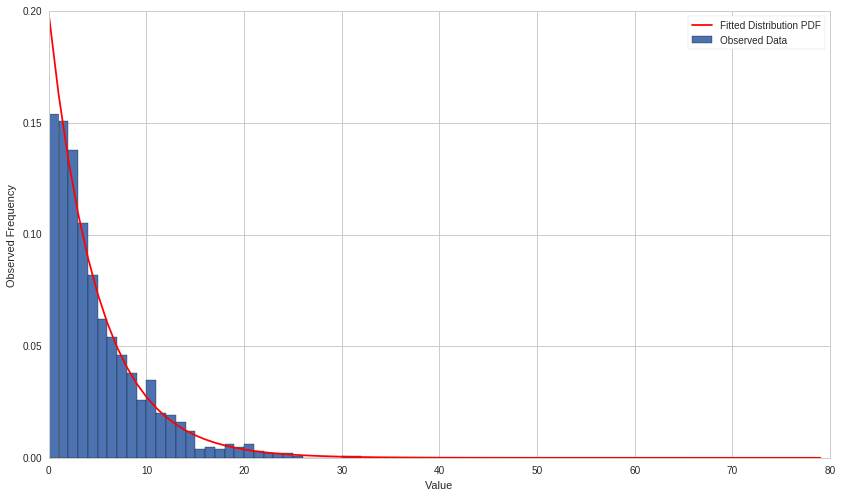

In [9]:
# Get the PDF, fill it with your calculated parameter, and plot it along x
x = range(0, 80)

plt.hist(X, bins=x, normed='true')
plt.plot(scipy.stats.expon.pdf(x, scale=l), color = 'red')
plt.xlabel('Value')
plt.ylabel('Observed Frequency')
plt.legend(['Fitted Distribution PDF', 'Observed Data', ]);

----

# Exercise 3 : Fitting Data Using MLE
- Using the MLE estimators laid out in the lecture, fit the returns for SPY from 2014 to 2015 to a normal distribution.   
- Check for normality using the Jarque-Bera test

In [10]:
prices = get_pricing('SPY', 
                     fields='price', 
                     start_date='2016-01-04', 
                     end_date='2016-01-05', 
                     frequency = 'minute')
returns = prices.pct_change()[1:]

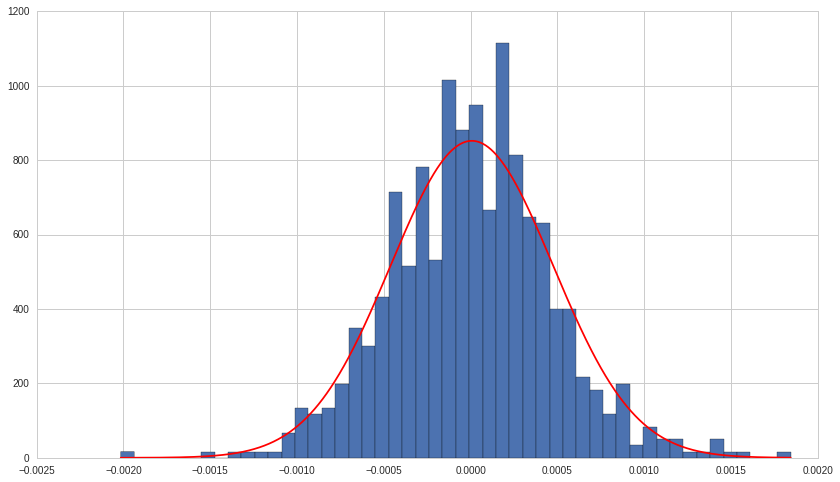

In [11]:
mu = normal_mu(returns)
std = normal_sigma(returns)

x = np.linspace(returns.min(), returns.max(), num=1000)
h = plt.hist(returns, bins=50, normed='true')
l = plt.plot(x, scipy.stats.norm.pdf(x, loc=mu, scale=std), color = 'red')
plt.show(h, l);

Recall that this fit **only** makes sense **if** we have normally distributed data.

In [12]:
alpha = 0.05
stat, pval = scipy.stats.mstats.normaltest(returns)
print pval

if pval > alpha: 
    print 'Accept our null hypothesis'
if pval < alpha: 
    print 'Reject our null hypothesis'

0.000572927470337
Reject our null hypothesis


---

Congratulations on completing the Maximum Likelihood Estimation exercises!

As you learn more about writing trading models and the Quantopian platform, enter the daily [Quantopian Contest](https://www.quantopian.com/contest). Your strategy will be evaluated for a cash prize every day.

Start by going through the [Writing a Contest Algorithm](https://www.quantopian.com/tutorials/contest) tutorial.

*This presentation is for informational purposes only and does not constitute an offer to sell, a solicitation to buy, or a recommendation for any security; nor does it constitute an offer to provide investment advisory or other services by Quantopian, Inc. ("Quantopian"). Nothing contained herein constitutes investment advice or offers any opinion with respect to the suitability of any security, and any views expressed herein should not be taken as advice to buy, sell, or hold any security or as an endorsement of any security or company.  In preparing the information contained herein, Quantopian, Inc. has not taken into account the investment needs, objectives, and financial circumstances of any particular investor. Any views expressed and data illustrated herein were prepared based upon information, believed to be reliable, available to Quantopian, Inc. at the time of publication. Quantopian makes no guarantees as to their accuracy or completeness. All information is subject to change and may quickly become unreliable for various reasons, including changes in market conditions or economic circumstances.*